# Part 3 (visualization practice for stream lit app)

- My main obstacle for now is understanding how all these different parts (notebooks, .csv's, plots, streamlit library) work together in reality since it's my first time fully executing an app idea.
- After some trial and error I have decided to adopt the altair method of plotting however different the syntax may be it will go miles further in producing my desired aesthetic

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

---
### Test Graph for streamlit app

- One simple idea to get the ball rolling would be a simple time series graph of a single restaurants inspection history plotting the number of violations they had at each time along with type of inspection (color coded)

In [22]:
# load dataset
chicago = pd.read_csv('../data/processed_chicago.csv')
chicago.head(3)

,inspection_date,inspection_id,dba_name,aka_name,license,facility_type,risk,address,inspection_type,results,violations,num_inspections,violation_count,violation_codes,is_reinspection,severity_levels,average_severity
0,2018-07-03,2182205,TELLER'S COFFEE,TELLERS,2578604,Restaurant,Risk 2 (Medium),111 W MONROE ST,Required Inspection to Open,Pass,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",8,2,"[3, 5]",False,"[10, 10]",10.000000
1,2018-07-03,2184221,MASON/BLIND DRAGON,YOURS TRULY,2469375,Restaurant,Risk 1 (High),611-613 N WELLS ST,Revisiting Inspection to Open,Pass,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",12,7,"[3, 5, 25, 36, 39, 56, 58]",False,"[10, 10, 7, 4, 4, 5, 1]",5.857143
2,2018-07-03,2182189,SUBWAY,SUBWAY,2590201,Restaurant,Risk 1 (High),2512 W NORTH AVE,Required Inspection to Open,Pass,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",12,8,"[3, 5, 39, 47, 53, 55, 55, 58]",False,"[10, 10, 4, 5, 8, 1, 1, 1]",5.000000


In [24]:
# lets check out a single mcdonalds location by license #
df = chicago[chicago['license'] == 2549249.0].copy()

df

,inspection_date,inspection_id,dba_name,aka_name,license,facility_type,risk,address,inspection_type,results,violations,num_inspections,violation_count,violation_codes,is_reinspection,severity_levels,average_severity
27,2018-07-03,2184228,McDONALD'S,McDONALD'S,2549249,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Revisiting Complaint Inspection,Pass,No Violations,8,0,[],False,[],0.000000
10004,2019-07-02,2300661,McDONALD'S,McDONALD'S,2549249,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Inspection Due to Customer Complaint,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,8,3,"[10, 36, 56]",False,"[6, 4, 5]",5.000000
18615,2020-04-24,2369691,McDONALD'S,McDONALD'S,2549249,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Standard Inspection,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,8,3,"[10, 10, 16]",False,"[6, 6, 10]",7.333333
18654,2020-04-28,2369797,McDONALD'S,McDONALD'S,2549249,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Standard Re-Inspection,Pass,No Violations,8,0,[],True,[],0.000000
24027,2021-01-27,2473205,McDONALD'S,McDONALD'S,2549249,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Standard Inspection,Pass,56. ADEQUATE VENTILATION & LIGHTING; DESIGNATE...,8,1,[56],False,[5],5.000000
36181,2022-06-06,2556849,McDONALD'S,McDONALD'S,2549249,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Standard Inspection,Pass,No Violations,8,0,[],False,[],0.000000
42040,2022-12-22,2568909,McDONALD'S,McDONALD'S,2549249,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Inspection Due to Customer Complaint,Fail,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",8,3,"[38, 47, 55]",False,"[4, 5, 1]",3.333333
42121,2022-12-29,2569082,McDONALD'S,McDONALD'S,2549249,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Revisiting Complaint Inspection,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",8,1,[55],False,[1],1.000000


In [26]:
def plot_history(data, name, address):
    '''
        This is a test function to display the violation count history of a single location
    '''
    plt.figure(figsize = (14, 4))
    
    sns.scatterplot(data = data,
                   x = data.index,
                   y = 'violation_count',
                   hue = 'inspection_type',
                   palette = 'tab10',
                   s = 200)
    
    plt.title(f'Violation Count of {name} at {address}', size = 25)
    plt.xlabel('Date of Inspection', size = 25)
    plt.ylabel('Number of Violations', size = 20)
    plt.xticks(rotation = 30)
    plt.grid(True)
    
    plt.legend(title = 'Type of Inspection', bbox_to_anchor = (1, 1))
    plt.show();

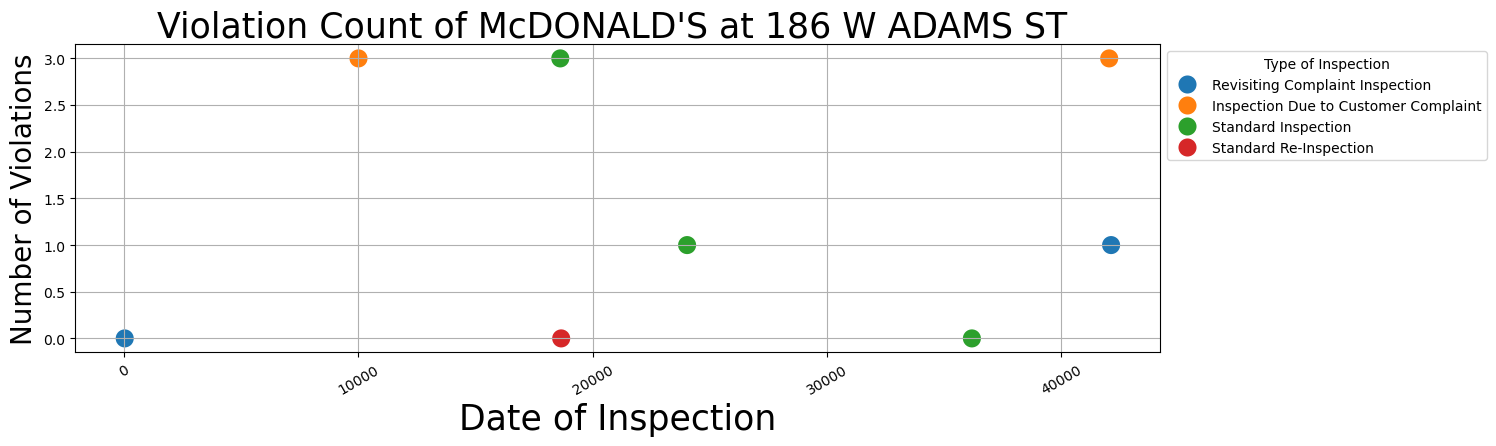

In [28]:
plot_history(df,
            name = df['aka_name'].iloc[0],
            address = df['address'].iloc[0])

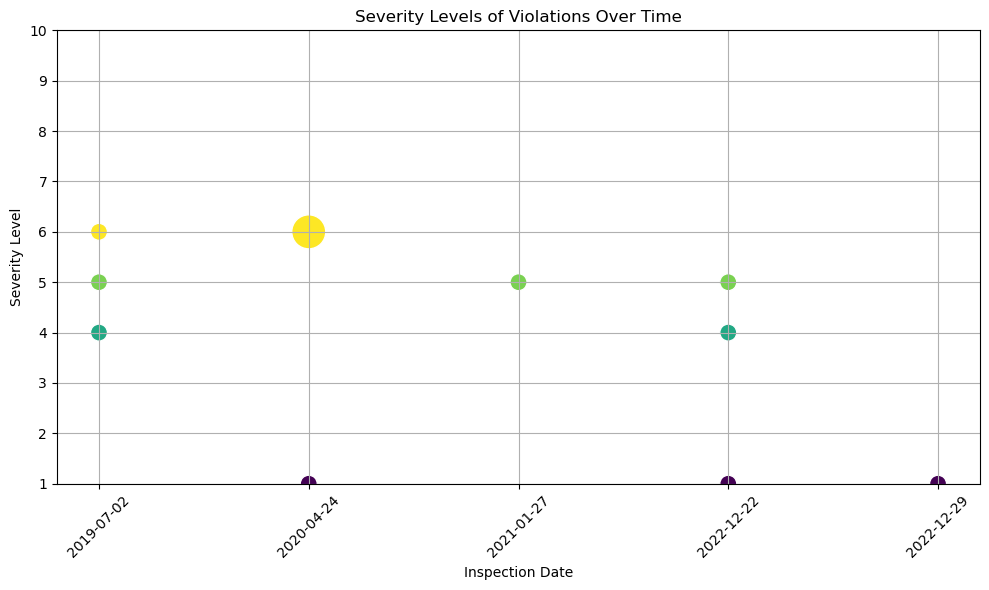

In [47]:
expanded_data = []
for idx, row in df.iterrows():
    for code, severity in zip(row['violation_codes'], row['severity_levels']):
        expanded_data.append([row['inspection_date'], severity])

expanded_df = pd.DataFrame(expanded_data, columns=['inspection_date', 'severity_level'])

# Step 2: Count the occurrences of each severity level at each inspection date
count_df = expanded_df.groupby(['inspection_date', 'severity_level']).size().reset_index(name='count')

# Step 3: Ensure 'severity_level' is treated as numeric
count_df['severity_level'] = pd.to_numeric(count_df['severity_level'], errors='coerce')

# Step 4: Filter the data to include only severity levels between 1 and 10
count_df = count_df[count_df['severity_level'].between(1, 10)]

# Step 5: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=count_df, x='inspection_date', y='severity_level', size='count', 
                hue='severity_level', palette='viridis', sizes=(150, 600), legend=None)

# Step 6: Set y-axis limits from 1 to 10 and ensure it's treated as a continuous scale
plt.ylim(1, 10)

# Step 7: Add grid and other plot details
plt.title('Severity Levels of Violations Over Time')
plt.xlabel('Inspection Date')
plt.ylabel('Severity Level')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()